In [1]:
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Data Packages
import math
import pandas
import numpy as np

#Progress bar
from tqdm import tqdm #To see your process

#Counter
from collections import Counter

#Operation
import operator

#Natural Language Processing Packages
import re #RegEx
import nltk

## Download Resources
nltk.download("vader_lexicon")
nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("wordnet")

from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.tag import PerceptronTagger
from nltk.data import find

## Machine Learning
import sklearn
import sklearn.metrics as metrics

[nltk_data] Downloading package vader_lexicon to C:\Windows\ServicePro
[nltk_data]     files\LocalService\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Windows\ServiceProfile
[nltk_data]     s\LocalService\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to C:\Windo
[nltk_data]     ws\ServiceProfiles\LocalService\AppData\Roaming\nltk_d
[nltk_data]     ata...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to C:\Windows\ServiceProfiles\
[nltk_data]     LocalService\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
def evalSentences(sentences, to_df=False, columns=[]):
    '''
    Does a polarity analysis on the sentences
    '''
    
    #to_df = To Dataframe
    #Instantiate an instance to access SentimentIntensityAnalyzer class
    sid = SentimentIntensityAnalyzer() #Class was imported from Vader
    pdlist = []
    if to_df: 
        for sentence in tqdm(sentences):
            sentence = str(sentence)
            ss = sid.polarity_scores(sentence)
            pdlist.append([sentence]+[ss['compound']])
        reviewDf = pandas.DataFrame(pdlist)
        reviewDf.columns = columns
        return reviewDf
    
    else:
        for sentence in tqdm(sentences):
            print(sentence)
            ss = sid.polarity_scores(sentence) #polarity_scores is a function in SentimentIntensityAnalyzer()
            for k in sorted(ss):
                print('{0}: {1}, '.format(k, ss[k]), end='')
            print()

In [3]:
#Read in from pandas and add column names
filename = 'reviews.csv'
hotelDF = pandas.read_csv(filename)
hotelDF.columns=['idNum','filePath','hotelName','reviewColumn','ratingScore','groundTruth']


In [4]:
hotelDF.head()

,idNum,filePath,hotelName,reviewColumn,ratingScore,groundTruth
0,173052129,data\ca\154973\182784\173462430.html,Hearthstone Inn Sydney,Conveniently located on the main strip of King...,3,negative
1,173462430,data\ca\154973\182784\174387120.html,Hearthstone Inn Sydney,My friends and I stayed here while we were vis...,2,negative
2,174452986,data\ca\154973\182784\175480997.html,Hearthstone Inn Sydney,I found this hotel to be very run down. There ...,2,negative
3,178618103,data\ca\154973\182784\179124427.html,Hearthstone Inn Sydney,The carpets were stained and could do with a g...,2,negative
4,179124427,data\ca\154973\182784\179979467.html,Hearthstone Inn Sydney,We decided kind of last minute that we wanted ...,3,negative


# Q1) Sentiment analysis and Aggregation

###       Q1 (a)

In [5]:

reviews = hotelDF['reviewColumn'].as_matrix() #Creates a review matrix

reviewDF = evalSentences(reviews, to_df=True, columns=['reviewColumn','vader']) #Provides vader scores

100%|███████████████████████████████████████████████████████████████████████████████| 730/730 [00:01<00:00, 476.74it/s]


In [6]:
reviewDF.head()

,reviewColumn,vader
0,Conveniently located on the main strip of King...,0.5272
1,My friends and I stayed here while we were vis...,0.9666
2,I found this hotel to be very run down. There ...,-0.0772
3,The carpets were stained and could do with a g...,0.3818
4,We decided kind of last minute that we wanted ...,-0.4016


In [7]:
#Adds Vader scores back to original hotel DF
hotelDF['vader'] = reviewDF['vader']


In [8]:
hotelDF.head()

,idNum,filePath,hotelName,reviewColumn,ratingScore,groundTruth,vader
0,173052129,data\ca\154973\182784\173462430.html,Hearthstone Inn Sydney,Conveniently located on the main strip of King...,3,negative,0.5272
1,173462430,data\ca\154973\182784\174387120.html,Hearthstone Inn Sydney,My friends and I stayed here while we were vis...,2,negative,0.9666
2,174452986,data\ca\154973\182784\175480997.html,Hearthstone Inn Sydney,I found this hotel to be very run down. There ...,2,negative,-0.0772
3,178618103,data\ca\154973\182784\179124427.html,Hearthstone Inn Sydney,The carpets were stained and could do with a g...,2,negative,0.3818
4,179124427,data\ca\154973\182784\179979467.html,Hearthstone Inn Sydney,We decided kind of last minute that we wanted ...,3,negative,-0.4016


In [9]:
#Creates a unique hotel name matrix
hotels = hotelDF['hotelName'].as_matrix()
hotels = np.unique(hotels)
print(hotels)
hotels.size

['Acadian Motel' "Albert\\'s Motel"
 'At The Harbourfront Bed & Breakfast Inn' "Burton\\'s Sunset Oasis Motel"
 'Cabot Links Resort' 'Cabot Trail Motel' 'Cambridge Suites - Sydney'
 "Canada\\'s Best Value Inn - Port Hawkesbury\\/Port Hastings"
 'Comfort Inn Sydney' 'Cornerstone Motel' 'Cove Motel' 'Fair Isle Motel'
 'Glenghorm Beach Resort' 'Hampton Inn by Hilton Sydney'
 'Hearthstone Inn Port Hawkesbury' 'Hearthstone Inn Sydney'
 'Hideaway Campground & Oyster Market' 'Holiday Inn Sydney Waterfront'
 'Hotel North' 'Inverary Resort' 'Keltic Lodge Resort & Spa'
 'MacNeil House' 'Margaree Riverview Inn' 'Maritime Inn Port Hawkesbury'
 'Ocean View Motel & Chalets' 'Point of View Suites at Louisbourg Gates'
 'Sea Breeze Cottages and Motel' 'Silver Dart Lodge'
 'Spanish Bay Inn and  Suites' 'The Clansman Motel' 'Trailsman Motel'
 'Travelodge Sydney']


32

In [10]:
def getHotelRank(hotelList, hotelDF, measure = 'ratingScore'):
    '''
    hotelList: list of all unique hotels
    hotelDF: hotel dataframe with vader scores and ratingScore
    measure: Either vader or ratingScore
    '''


    hotelRating = []
    for hotel in hotelList:
        itemDf = hotelDF.loc[hotelDF['hotelName']==hotel]
        hotelRating.append([hotel,itemDf[measure].mean()])
    hotelRatingDf = pandas.DataFrame(hotelRating)
    hotelRatingDf.columns=['hotelName','avgRatingScore']
    hotelRatingDf = hotelRatingDf.sort_values('avgRatingScore',ascending=0)
    return hotelRatingDf


### Q1 (b)

In [11]:

vaderRanking = getHotelRank(hotels, hotelDF,'vader')
gtRanking = getHotelRank(hotels, hotelDF)
#q1 b) (i)
print("\nGround Truth Top 5")
print(gtRanking.head(n=5))
print("\nGround Truth Bottom 5")
print(gtRanking.tail(n=5))

#Q1 b) (ii)
print("\nVader Top 5:")
print(vaderRanking.head(n=5))
print("\nVader Bottom 5:")
print(vaderRanking.tail(n=5))


#There are differences in the ranking espeically in the top 5. Bottom 5 are more smilar.



Ground Truth Top 5
                       hotelName  avgRatingScore
3   Burton\'s Sunset Oasis Motel        4.777778
13  Hampton Inn by Hilton Sydney        4.714286
1                Albert\'s Motel        4.640000
4             Cabot Links Resort        4.625000
29            The Clansman Motel        4.600000

Ground Truth Bottom 5
                                            hotelName  avgRatingScore
12                             Glenghorm Beach Resort        3.222222
15                             Hearthstone Inn Sydney        3.115385
6                           Cambridge Suites - Sydney        2.941176
7   Canada\'s Best Value Inn - Port Hawkesbury\/Po...        2.500000
14                    Hearthstone Inn Port Hawkesbury        2.428571

Vader Top 5:
                        hotelName  avgRatingScore
4              Cabot Links Resort        0.971575
28    Spanish Bay Inn and  Suites        0.964300
24     Ocean View Motel & Chalets        0.958617
9               Cornerstone M

Q1 (b) 
For the top hotels only one of the top 5 ground truth hotels appears in the top 5 for vader. On the otherhand, 3 of the bottom 5 ground truth hotels appear in the the bottom 5 for vader. Thus I'd say they agree more for negative sentiment where reviewers are more likely to be giving harsh ratings if the hotel was really a negative experience versus giving high positive ratings even though their reviews have some negative comments within

# Q2. Frequency Analysis

In [12]:
def getTopK(df, k, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewColumn'):
    stop = set(stopwords.words('english'))

    reviews = df.loc[operation(df[label_column],label_value)][value_column].as_matrix()
 

    counter = Counter()
    for review in df.loc[operation(df[label_column],label_value)][value_column]:
        review = str(review)
        counter.update([word.lower() 
                        for word 
                        in re.findall(r'\w+', review) 
                        if word.lower() not in stop and len(word) > 2 and word.isalpha()])
    topk = counter.most_common(k)
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',str(reviews[i]))])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pandas.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    #finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = df[['hotelName','reviewColumn','ratingScore','groundTruth','vader']].join(freqReviewDf)
    
    
    return topk, finaldf

In [13]:
itemAnalysisDf = hotelDF[['hotelName','ratingScore','reviewColumn','groundTruth','vader']]
itemAnalysisDf.head()

,hotelName,ratingScore,reviewColumn,groundTruth,vader
0,Hearthstone Inn Sydney,3,Conveniently located on the main strip of King...,negative,0.5272
1,Hearthstone Inn Sydney,2,My friends and I stayed here while we were vis...,negative,0.9666
2,Hearthstone Inn Sydney,2,I found this hotel to be very run down. There ...,negative,-0.0772
3,Hearthstone Inn Sydney,2,The carpets were stained and could do with a g...,negative,0.3818
4,Hearthstone Inn Sydney,3,We decided kind of last minute that we wanted ...,negative,-0.4016


### Q2(a)

In [14]:
#q2a
# (i)
topkGroundPos, finalDFPos = getTopK(df=itemAnalysisDf, k=50, label_value='positive')

print("Top 50 words in positive reviews are:\n")
print(topkGroundPos)
#(ii)
topkGroundNeg, finalDFNeg = getTopK(df=itemAnalysisDf, k=50, label_value='negative')
print("\nTop 50 words in negative reviews are:\n")
print(topkGroundNeg)

Top 50 words in positive reviews are:

[('room', 551), ('great', 351), ('hotel', 319), ('stay', 317), ('staff', 317), ('clean', 287), ('breakfast', 260), ('good', 243), ('nice', 233), ('stayed', 224), ('would', 216), ('rooms', 209), ('comfortable', 199), ('one', 194), ('view', 192), ('friendly', 186), ('lodge', 168), ('restaurant', 162), ('well', 161), ('night', 157), ('place', 148), ('motel', 136), ('food', 126), ('area', 122), ('beautiful', 121), ('location', 117), ('helpful', 115), ('also', 114), ('time', 113), ('trail', 108), ('pool', 97), ('front', 96), ('sydney', 96), ('cape', 96), ('wonderful', 95), ('dinner', 95), ('service', 94), ('inn', 91), ('like', 90), ('back', 89), ('breton', 89), ('recommend', 89), ('excellent', 87), ('cabot', 87), ('day', 87), ('really', 84), ('two', 83), ('views', 81), ('lovely', 80), ('enjoyed', 78)]

Top 50 words in negative reviews are:

[('room', 252), ('hotel', 122), ('night', 104), ('would', 102), ('stay', 95), ('one', 92), ('rooms', 78), ('resta

Q2a)
Interesting results:
Both of positive and negative have common subjects as people use different adjectives to describe similar nouns. There are also positive words appearing in negative reviewes. They probably had a negation word before it which made the review negative but this wasn't caught in Term Frequency.

### Q2 (b)

In [15]:
#Noun Phrases
tagger = PerceptronTagger()
pos_tag = tagger.tag


grammar = r"""
    NBAR:
        {<NN.*|JJ>*<NN.*>}  # Nouns and Adjectives, terminated with Nouns
        
    NP:
        {<NBAR>}
        {<NBAR><IN><NBAR>}  # Above, connected with in/of/etc...
"""

chunker = nltk.RegexpParser(grammar)

In [16]:
# Noun Phrase Extraction Support Functions
from nltk.corpus import stopwords
stop = stopwords.words('english')
lemmatizer = nltk.WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()

# generator, generate leaves one by one
def leaves(tree):
    """Finds NP (nounphrase) leaf nodes of a chunk tree."""
    for subtree in tree.subtrees(filter = lambda t: t.label()=='NP' or t.label()=='JJ' or t.label()=='RB'):
        yield subtree.leaves()

# stemming, lematizing, lower case... 
def normalise(word):
    """Normalises words to lowercase and stems and lemmatizes it."""
    word = word.lower()
    word = stemmer.stem(word)
    word = lemmatizer.lemmatize(word)
    return word

# stop-words and length control
def acceptable_word(word):
    """Checks conditions for acceptable word: length, stopword."""
    accepted = bool(2 <= len(word) <= 40
        and word.lower() not in stop)
    return accepted

# generator, create item once a time
def get_terms(tree):
    for leaf in leaves(tree):
        term = [normalise(w) for w,t in leaf if acceptable_word(w) ]
        # Phrase only
        if len(term)>1:
            yield term

In [17]:
def flatten(npTokenList):
    finalList =[]
    for phrase in npTokenList:
        token = ''
        for word in phrase:
            token += word + ' '
        finalList.append(token.rstrip())
    return finalList

In [18]:
def newDataFrameTransformationCatSplit(df, k, label_value, label_column='groundTruth', operation=operator.eq, value_column='reviewColumn'):
    
    reviews = df.loc[operation(df[label_column],label_value)][value_column].as_matrix()
    
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
        review = str(review)
        counter.update(flatten([word
                        for word 
                        in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                        ]))
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for review in reviews:
        review = str(review)
        tempCounter = Counter(flatten([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',review))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pandas.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = df[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return topk, finaldf

In [19]:
topk_phrase_positive, finaldf_phrase_positive = newDataFrameTransformationCatSplit(hotelDF, 50, 'positive')
topk_phrase_negative, finaldf_phrase_negative = newDataFrameTransformationCatSplit(hotelDF, 50, 'negative')

In [20]:
print("Positive\n", topk_phrase_positive)
print("\nNegative\n",topk_phrase_negative)

Positive
 [('cabot trail', 50), ('cape breton', 48), ('keltic lodg', 44), ('front desk', 29), ('dine room', 28), ('main lodg', 26), ('great place', 24), ('nova scotia', 19), ('great view', 19), ('beauti view', 15), ('great locat', 14), ('hampton inn', 14), ('nice view', 13), ('next morn', 13), ('front desk staff', 11), ('breakfast buffet', 10), ('great time', 9), ('comfort bed', 9), ('ocean view', 9), ('long day', 9), ('good food', 9), ('purpl thistl', 9), ('second floor', 9), ('friendli staff', 9), ('cove motel', 9), ('cornerston motel', 8), ('silver dart lodg', 8), ('golf cours', 8), ('outdoor pool', 7), ('live music', 7), ('night stay', 7), ('next day', 7), ('main dine room', 7), ('holiday inn', 7), ('coffe maker', 7), ('good valu', 7), ('bra lake', 7), ('silver dart', 7), ('great stay', 7), ('nation park', 7), ('great hotel', 6), ('good place', 6), ('great breakfast', 6), ('nice touch', 6), ('hot tub', 6), ('spectacular view', 6), ('clean room', 6), ('great food', 6), ('next year',

Q2b) Interesting: Positive reviews have more landmarks such as 'cabot trail' or the city itself versus negative reviews. 

In [21]:
def newDataFrameTransformation(hotelDf, reviewDF, k=50):
    reviews = reviewDF['reviewColumn'].as_matrix()
    
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
        review = str(review)
        counter.update(flatten([word
                        for word 
                        in get_terms(chunker.parse(pos_tag(re.findall(r'\w+', review)))) 
                        ]))
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter(flatten([word 
                                       for word 
                                       in get_terms(chunker.parse(pos_tag(re.findall(r'\w+',reviews[i]))))]))
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pandas.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return topk, finaldf

In [22]:
topk_phrase, finaldf_phrase = newDataFrameTransformation(hotelDF, reviewDF)

In [23]:
topk_phrase

[('cabot trail', 58),
 ('keltic lodg', 56),
 ('cape breton', 55),
 ('front desk', 46),
 ('main lodg', 36),
 ('dine room', 34),
 ('great place', 25),
 ('nova scotia', 22),
 ('great view', 21),
 ('beauti view', 17),
 ('next morn', 17),
 ('great locat', 16),
 ('front desk staff', 16),
 ('hampton inn', 15),
 ('breakfast buffet', 13),
 ('nice view', 13),
 ('purpl thistl', 13),
 ('second night', 11),
 ('ocean view', 11),
 ('night stay', 11),
 ('next day', 11),
 ('long day', 11),
 ('pool area', 11),
 ('second floor', 11),
 ('good place', 10),
 ('first night', 10),
 ('good valu', 10),
 ('friendli staff', 10),
 ('great time', 9),
 ('comfort bed', 9),
 ('silver dart lodg', 9),
 ('good food', 9),
 ('silver dart', 9),
 ('golf cours', 9),
 ('cove motel', 9),
 ('holiday inn', 9),
 ('cornerston motel', 8),
 ('outdoor pool', 8),
 ('live music', 8),
 ('main dine room', 8),
 ('hotel staff', 8),
 ('park lot', 8),
 ('free breakfast', 8),
 ('complimentari breakfast', 8),
 ('nice touch', 7),
 ('differ room'

In [24]:
def dataFrameTransformation(hotelDf, reviewDF, k=50):
    reviews = reviewDF['reviewColumn'].as_matrix()
    from nltk.corpus import stopwords
    stop = set(stopwords.words('english'))
    
    # Top-k frequent terms
    counter = Counter()
    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) #USE NLTK if you are going to do this for a business
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(k)        
    
    #Find out if a particular review has the word from topk list
    freqReview = []
    for i in range(len(reviews)):
        tempCounter = Counter([word.lower() for word in re.findall(r'\w+',reviews[i])])
        topkinReview = [1 if tempCounter[word] > 0 else 0 for (word,wordCount) in topk]
        freqReview.append(topkinReview)
        
        
    #Prepare freqReviewDf
    freqReviewDf = pandas.DataFrame(freqReview)
    dfName = []
    for c in topk:
        dfName.append(c[0])
    freqReviewDf.columns = dfName
    finalreviewDf = reviewDF.join(freqReviewDf)
    finaldf = hotelDf[['hotelName','ratingScore','groundTruth']].join(finalreviewDf)
    return topk, finaldf

# Q3. Mutual Information

### Q3(a)

In [25]:
def getMI(topk, finaldf, label_column='groundTruth'):
    miScore = []
    for word in topk:
        miScore.append([word[0]]+[metrics.mutual_info_score(finaldf[label_column], finaldf[word[0]])])
    miScoredf = pandas.DataFrame(miScore).sort_values(1,ascending=0)
    miScoredf.columns = ['Word','MI Score']
    return miScoredf

In [26]:
topk, finalDF = dataFrameTransformation(hotelDF, reviewDF)
#print(topk)
miScoredf = getMI(topk, finalDF)

miScoredf.head(n=50)


,Word,MI Score
35,helpful,0.015035
15,comfortable,0.012701
18,friendly,0.011695
13,night,0.010390
3,great,0.009999
27,like,0.009050
34,two,0.008094
39,could,0.007910
11,one,0.006711
33,get,0.006286


Q3 (a) The words that are highly ranked by MI are very positive except for night. These adjectives are those that one would expect in positive reviews. There were probably several positive reviews in this data set

### Q3 (b)

In [27]:
miScoredfNP = getMI(topk_phrase, finaldf_phrase)
miScoredfNP.head(n=50)

,Word,MI Score
22,pool area,1.038823e-02
25,first night,5.557764e-03
45,differ room,5.251752e-03
6,great place,4.777491e-03
15,nice view,3.867464e-03
48,qualiti inn,3.685648e-03
2,cape breton,3.435563e-03
31,good food,3.159291e-03
29,comfort bed,3.159291e-03
34,cove motel,2.806044e-03


Q3 (b) All phrases have very low MI score. This is probably because people use different phrases when writing reviews so it is hard to find commonality on a small data set.

# Q4. Pointwise Mutual Information

In [28]:
#Simple example of getting pairwise mutual information of a term
def pmiCal(df, x):
    pmilist=[]
    for i in ['positive','negative']:
        for j in [0,1]:
            px = sum(df['groundTruth']==i)/len(df)
            py = sum(df[x]==j)/len(df)
            pxy = len(df[(df['groundTruth']==i) & (df[x]==j)])/len(df)
            if pxy==0:#Log 0 cannot happen
                pmi = math.log10((pxy+0.0001)/(px*py))
            else:
                pmi = math.log10(pxy/(px*py))
            pmilist.append([i]+[j]+[px]+[py]+[pxy]+[pmi])
    pmidf = pandas.DataFrame(pmilist)
    pmidf.columns = ['x','y','px','py','pxy','pmi']
    return pmidf

In [29]:
def pmiIndivCal(df,x,gt, label_column='groundTruth'):
    px = sum(df[label_column]==gt)/len(df)
    py = sum(df[x]==1)/len(df)
    pxy = len(df[(df[label_column]==gt) & (df[x]==1)])/len(df)
    if pxy==0:#Log 0 cannot happen
        pmi = math.log10((pxy+0.0001)/(px*py))
    else:
        pmi = math.log10(pxy/(px*py))
    return pmi

In [30]:
# Compute PMI for all terms and all possible labels

def pmiForAllCal(df, topk=topk, label_column='groundTruth'):

    #Try calculate all the pmi for top k and store them into one pmidf dataframe

    pmilist = []

    pmiposlist = []

    pmineglist = []

    for word in tqdm(topk):

        pmilist.append([word[0]]+[pmiCal(df,word[0])])

        pmiposlist.append([word[0]]+[pmiIndivCal(df,word[0],'positive',label_column)])

        pmineglist.append([word[0]]+[pmiIndivCal(df,word[0],'negative',label_column)])

    pmidf = pandas.DataFrame(pmilist)

    pmiposlist = pandas.DataFrame(pmiposlist)

    pmineglist = pandas.DataFrame(pmineglist)

    pmiposlist.columns = ['word','pmi']

    pmineglist.columns = ['word','pmi']

    pmidf.columns = ['word','pmi']

    return pmiposlist, pmineglist, pmidf


In [31]:
pmiposlist, pmineglist, pmidf = pmiForAllCal(finalDF)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 24.14it/s]


In [32]:
pmiposlist.head(n=50).sort_values('pmi',ascending=0)

,word,pmi
35,helpful,0.076352
18,friendly,0.054153
15,comfortable,0.053729
28,beautiful,0.050508
43,dinner,0.044410
32,trail,0.039443
46,breton,0.039331
3,great,0.038931
42,cape,0.035873
16,view,0.035719


In [33]:
pmineglist.head(n=50).sort_values('pmi',ascending=0)

,word,pmi
39,could,0.209146
34,two,0.208081
27,like,0.203542
48,bed,0.189841
33,get,0.188226
13,night,0.164518
38,day,0.162672
44,desk,0.145344
11,one,0.131241
45,even,0.117000


Q4a) The negative words are really unexpected and do not give much meaning whereas the positive words are more obvious such as helpful friendly etc.. This makes sense as about 80% of the reviews are positive so common words are more likely to appear.

### Q4(b)

In [34]:
pmiposlist, pmineglist, pmidf = pmiForAllCal(finaldf_phrase,topk_phrase)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:02<00:00, 18.38it/s]


In [35]:
pmineglist.sort_values('pmi',ascending=0).head()

,word,pmi
22,pool area,0.551569
45,differ room,0.502351
25,first night,0.472388
48,qualiti inn,0.472388
17,second night,0.296296


In [36]:
pmiposlist.sort_values('pmi',ascending=0).head()

,word,pmi
28,great time,0.110506
29,comfort bed,0.110506
31,good food,0.110506
34,cove motel,0.110506
36,cornerston motel,0.110506


In [37]:
pmitotal = pmiposlist.copy()

pmitotal['pmiNeg'] = pmineglist['pmi']
pmitotal.columns = ['word', 'pmiPos', 'pmiNeg']
pmitotal.sort_values('pmiPos',ascending=0).head(n=51)

,word,pmiPos,pmiNeg
28,great time,0.110506,-1.391288
29,comfort bed,0.110506,-1.442441
31,good food,0.110506,-1.442441
34,cove motel,0.110506,-1.391288
36,cornerston motel,0.110506,-1.333296
15,nice view,0.110506,-1.529591
49,bra lake,0.110506,-1.266349
46,coffe maker,0.110506,-1.333296
6,great place,0.092778,-0.749461
13,hampton inn,0.072718,-0.430702


Q4b) The phrases give a better picture of what are the aspects that made a review positive and negative. As adjectives and nouns are together we get a better understanding of the reviews.

### Q4c)

In [38]:
#For Cape Breton
topHotel = 'Hampton Inn by Hilton Sydney' 
bottomHotel = 'Hearthstone Inn Port Hawkesbury'

#For Markham 
#topHotel = 'TownePlace Suites Toronto Northeast/Markham' 
#bottomHotel = 'Park Inn By Radisson Toronto-Markham'

topHotelDF = finaldf_phrase.loc[finaldf_phrase['hotelName']== (topHotel)]
bottomHotelDF = finaldf_phrase.loc[finaldf_phrase['hotelName']== (bottomHotel)]



In [39]:
pmiposlistTop, pmineglistTop, pmidfTop = pmiForAllCal(topHotelDF,topk_phrase)
pmiposlistBottom, pmineglistBottom, pmidfBottom = pmiForAllCal(bottomHotelDF,topk_phrase)

  0%|                                                                                           | 0/50 [00:00<?, ?it/s]C:\Anaconda\envs\py35\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: divide by zero encountered in double_scalars
C:\Anaconda\envs\py35\lib\site-packages\ipykernel\__main__.py:6: RuntimeWarning: divide by zero encountered in double_scalars
100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 57.33it/s]


In [40]:
pmitotalTop = pmiposlistTop.copy()

pmitotalTop['pmiNeg'] = pmineglistTop['pmi']
pmitotalTop.columns = ['word', 'pmiPos', 'pmiNeg']
pmitotalTop.sort_values('pmiPos',ascending=0).head(n=51)

,word,pmiPos,pmiNeg
25,first night,inf,inf
20,next day,inf,inf
1,keltic lodg,inf,inf
26,good valu,inf,inf
30,silver dart lodg,inf,inf
31,good food,inf,inf
32,silver dart,inf,inf
33,golf cours,inf,inf
34,cove motel,inf,inf
35,holiday inn,inf,inf


In [41]:
pmitotalBottom = pmiposlistBottom.copy()

pmitotalBottom['pmiNeg'] = pmineglistBottom['pmi']
pmitotalBottom.columns = ['word', 'pmiPos', 'pmiNeg']
pmitotalBottom.sort_values('pmiPos',ascending=0).head(n=51)

,word,pmiPos,pmiNeg
0,cabot trail,inf,inf
35,holiday inn,inf,inf
26,good valu,inf,inf
27,friendli staff,inf,inf
28,great time,inf,inf
29,comfort bed,inf,inf
30,silver dart lodg,inf,inf
31,good food,inf,inf
32,silver dart,inf,inf
33,golf cours,inf,inf


Q4c)

Yes. The top hotel has a parking lot, complimentary breakfast and good hotel staff as these words appear more often in positive reveiws 
Where as in the lowest hotel most common phrases do not occur giving us inf for most of the values. However we can see people disliked the breakfast and front desk staff. they also tended to choose a different room when staying there.

# Q5. General Plots

### Q5a) (a)

In [42]:
def getHistogram(finaldf, measure, title):
    if measure=='both':
        x = [finaldf['ratingScore'].as_matrix()/5]
        y = [finaldf['vader'].as_matrix()]
        bins = np.linspace(-1, 1, 100)
        plt.title(title)
        plt.hist(x, bins, label='x')
        plt.hist(y, bins, label='y')
        plt.legend(loc='upper right')
        plt.show()
    
    else:
        plt.hist(finaldf[measure].as_matrix())
        plt.title(title)
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        fig = plt.gcf()

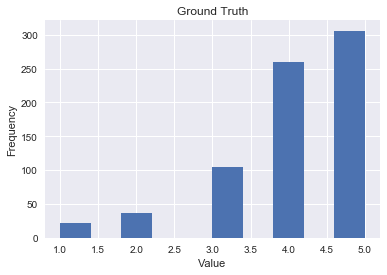

In [43]:
getHistogram(hotelDF, 'ratingScore', 'Ground Truth')

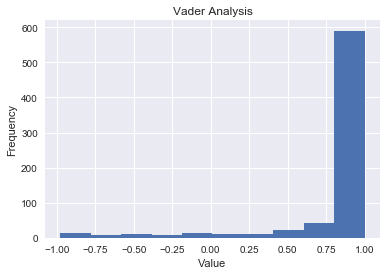

In [44]:
getHistogram(hotelDF, 'vader', 'Vader Analysis')

Q5a) Vader is heavily skewed towards the positive sentiment where as ground truth is more distibuted across the different ratings. Thus vader assumes majority of the reviews have positive sentiments while we see this isn't true necessarily as per groundTruth.

### Q5a) (b)

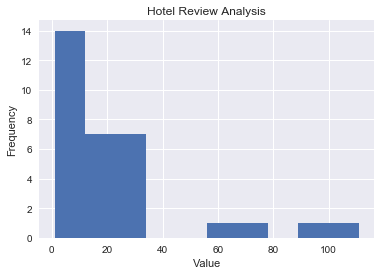

In [45]:
# Code takes value count to see the number of revies per hotel. Code sourced from https://stackoverflow.com/questions/35809098/how-to-merge-pandas-value-counts-to-dataframe-or-use-it-to-subset-a-dataframe

numreviewsDF = pandas.DataFrame(hotelDF.hotelName.value_counts().reset_index().rename(columns={'index': 'hotelName', 0: 'numofReviews'}))
numreviewsDF.columns = ['hotelName', 'numofReviews']

hotelDF['numofReviews'] = hotelDF.groupby(['hotelName'])['hotelName'].transform('count')

getHistogram(numreviewsDF, 'numofReviews', 'Hotel Review Analysis')



Q5b) The trend shows most hotels have a sparse number of reviews. As this is a small town it makes sense there are very few reviews for the hotels. The high frequency for a couple hotels probably are the popular hotels that most of the tourists choose to stay in

### Q5b) (a) and (b)

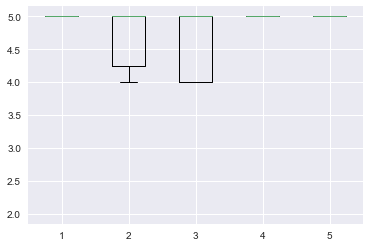

hotel 1 Mean is 4.777778 and Variance is 0.395062: 
hotel 2 Mean is 4.714286 and Variance is 0.265306: 
hotel 3 Mean is 4.640000 and Variance is 0.230400: 
hotel 4 Mean is 4.625000 and Variance is 0.984375: 
hotel 5 Mean is 4.600000 and Variance is 0.640000: 


In [46]:
### Rating Score Box Plots and Mean/Variance

tp5gthotel = gtRanking.sort_values('avgRatingScore',ascending=0).head(5)
tp5gthotel['hotelName'].as_matrix()
finaldf = hotelDF
hotel1RS = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].as_matrix()[0]]['ratingScore']
hotel2RS = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].as_matrix()[1]]['ratingScore']
hotel3RS = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].as_matrix()[2]]['ratingScore']
hotel4RS = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].as_matrix()[3]]['ratingScore']
hotel5RS = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].as_matrix()[4]]['ratingScore']

data = [hotel1RS, hotel2RS, hotel3RS, hotel4RS, hotel5RS]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)
plt.show()

hotel1Mean = np.mean(hotel1RS)
hotel1Var = np.var(hotel1RS)

print("hotel 1 Mean is %lf and Variance is %lf: " % (hotel1Mean, hotel1Var))

hotel2Mean = np.mean(hotel2RS)
hotel2Var = np.var(hotel2RS)
print("hotel 2 Mean is %lf and Variance is %lf: " % (hotel2Mean, hotel2Var))

hotel3Mean = np.mean(hotel3RS)
hotel3Var = np.var(hotel3RS)
print("hotel 3 Mean is %lf and Variance is %lf: " % (hotel3Mean, hotel3Var))

hotel4Mean = np.mean(hotel4RS)
hotel4Var = np.var(hotel4RS)
print("hotel 4 Mean is %lf and Variance is %lf: " % (hotel4Mean, hotel4Var))

hotel5Mean = np.mean(hotel5RS)
hotel5Var = np.var(hotel5RS)
print("hotel 5 Mean is %lf and Variance is %lf: " % (hotel5Mean, hotel5Var))


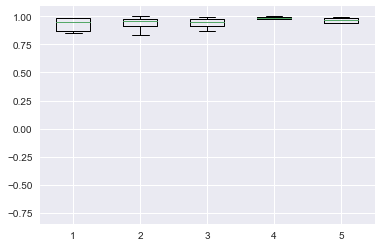

hotel 1 Mean is 0.795844 and Variance is 0.167848: 
hotel 2 Mean is 0.880749 and Variance is 0.055080: 
hotel 3 Mean is 0.892300 and Variance is 0.035994: 
hotel 4 Mean is 0.971575 and Variance is 0.001986: 
hotel 5 Mean is 0.915680 and Variance is 0.011928: 


In [47]:
### Vader Score Box Plots and Mean/Variance

hotel1Vader = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].as_matrix()[0]]['vader']
hotel2Vader = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].as_matrix()[1]]['vader']
hotel3Vader = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].as_matrix()[2]]['vader']
hotel4Vader = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].as_matrix()[3]]['vader']
hotel5Vader = finaldf.loc[finaldf['hotelName'] == tp5gthotel['hotelName'].as_matrix()[4]]['vader']

data = [hotel1Vader, hotel2Vader, hotel3Vader, hotel4Vader, hotel5Vader]
# multiple box plots on one figure
plt.figure()
plt.boxplot(data)
plt.show()

hotel1Mean = np.mean(hotel1Vader)
hotel1Var = np.var(hotel1Vader)

print("hotel 1 Mean is %lf and Variance is %lf: " % (hotel1Mean, hotel1Var))

hotel2Mean = np.mean(hotel2Vader)
hotel2Var = np.var(hotel2Vader)
print("hotel 2 Mean is %lf and Variance is %lf: " % (hotel2Mean, hotel2Var))

hotel3Mean = np.mean(hotel3Vader)
hotel3Var = np.var(hotel3Vader)
print("hotel 3 Mean is %lf and Variance is %lf: " % (hotel3Mean, hotel3Var))

hotel4Mean = np.mean(hotel4Vader)
hotel4Var = np.var(hotel4Vader)
print("hotel 4 Mean is %lf and Variance is %lf: " % (hotel4Mean, hotel4Var))

hotel5Mean = np.mean(hotel5Vader)
hotel5Var = np.var(hotel5Vader)
print("hotel 5 Mean is %lf and Variance is %lf: " % (hotel5Mean, hotel5Var))


### Q5b) (c)

The box plots are more informative as it gives you a range over which most of the reviews are scored at and it can be seen graphically. It also tells you what the lowest and highest score are.

### Q5 (c) a)

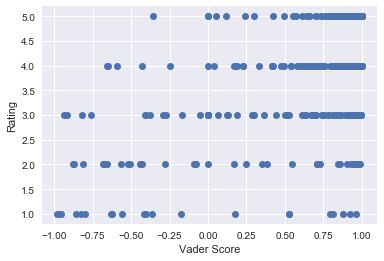

In [48]:
# Scatterplot
y = finaldf['ratingScore'].as_matrix()
x = finaldf['vader'].as_matrix()
plt.plot(x, y,"o")
plt.ylabel('Rating')
plt.xlabel('Vader Score')

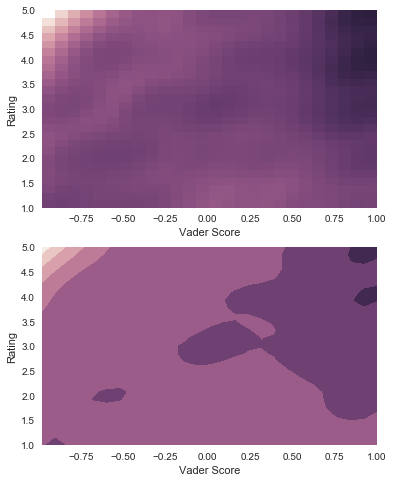

In [49]:
#Heatmap

from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Rating')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Rating')

It shows most of the reviews Vader gave a high sentiment score where as the rating was actually low for them. This is similar to the trends seen above. It shows humans are more unpredictable and they could write positive things in their reviews but still give lower scores. Or they add more positives aspects vs negative aspects but their weighting of the negative really affects their experience hence providing a lower star score

### Q5c) (b)

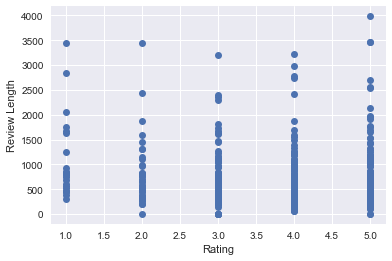

In [50]:
### Ground Truth Scatterplot

reviews = finaldf['reviewColumn'].as_matrix()
y=[]
for review in reviews:
    review = str(review)
    y.append(len(review))
y = np.array(y)

x = finaldf['ratingScore'].as_matrix()
plt.plot(x, y,"o")
plt.ylabel('Review Length')
plt.xlabel('Rating')


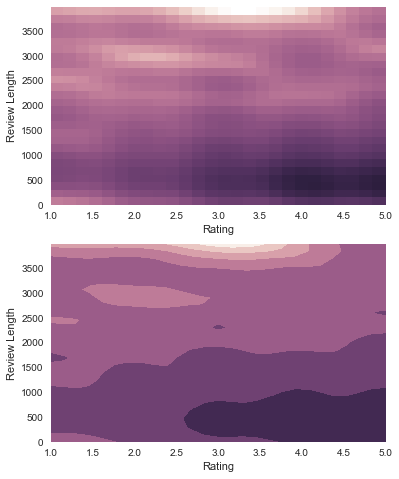

In [51]:
from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Rating')
ax1.set_ylabel('Review Length')

ax2.set_xlabel('Rating')
ax2.set_ylabel('Review Length')

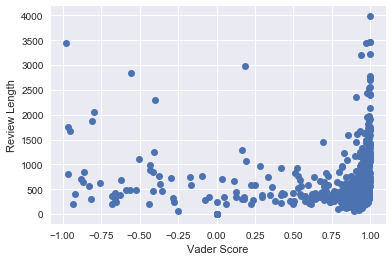

In [52]:
### Vader Scatterplot
reviews = finaldf['reviewColumn'].as_matrix()
y=[]
for review in reviews:
    review = str(review)
    y.append(len(review))
y = np.array(y)

x = finaldf['vader'].as_matrix()
plt.plot(x, y,"o")
plt.ylabel('Review Length')
plt.xlabel('Vader Score')


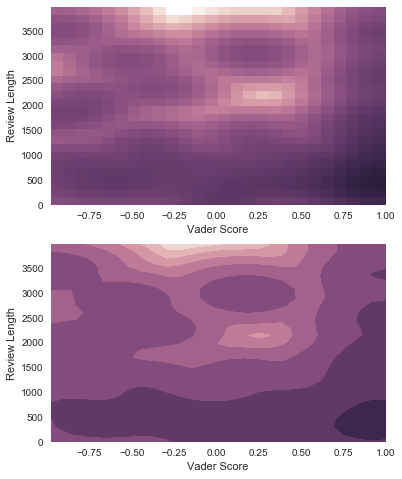

In [53]:
from scipy.stats.kde import gaussian_kde

k = gaussian_kde(np.vstack([x, y]))
xi, yi = np.mgrid[x.min():x.max():x.size**0.5*1j,y.min():y.max():y.size**0.5*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

cmap = sns.cubehelix_palette(light=1, as_cmap=True)
fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

ax1.pcolormesh(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)
ax2.contourf(xi, yi, np.log10(zi.reshape(xi.shape)), cmap=cmap)

ax1.set_xlim(x.min(), x.max())
ax1.set_ylim(y.min(), y.max())
ax2.set_xlim(x.min(), x.max())
ax2.set_ylim(y.min(), y.max())

ax1.set_xlabel('Vader Score')
ax1.set_ylabel('Review Length')

ax2.set_xlabel('Vader Score')
ax2.set_ylabel('Review Length')

Q5 (c) b)
The only trend visible through this is that visitors tend to write short reviews

### Q5cc

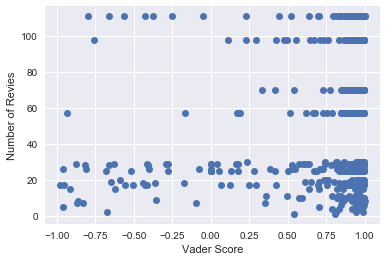

In [54]:
### Vader Scatterplot
y = finaldf['numofReviews'].as_matrix()

x = finaldf['vader'].as_matrix()
plt.plot(x, y,"o")
plt.ylabel('Number of Revies')
plt.xlabel('Vader Score')


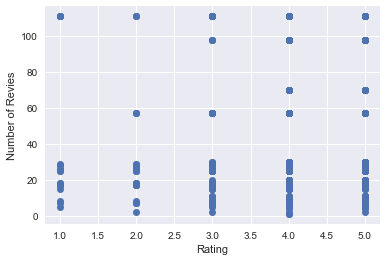

In [55]:
### Rating Scatterplot
y = finaldf['numofReviews'].as_matrix()

x = finaldf['ratingScore'].as_matrix()
plt.plot(x, y,"o")
plt.ylabel('Number of Revies')
plt.xlabel('Rating')


Q5c) c) Due to the sparsity of the data the trends aren't visible here that were not seen previously